<a href="https://colab.research.google.com/github/calvinsuzuki/CNN_lab/blob/main/cnn_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download de arquivos de dataset

In [5]:
!rm -r sample_data
!rm -r dataset
!gdown 1HDCqyHz6hCUvQ3xdktqRE9tht8wOOY80
!unzip -qq ./dataset.zip -d .

rm: cannot remove 'sample_data': No such file or directory
rm: cannot remove 'dataset': No such file or directory
Downloading...
From (original): https://drive.google.com/uc?id=1HDCqyHz6hCUvQ3xdktqRE9tht8wOOY80
From (redirected): https://drive.google.com/uc?id=1HDCqyHz6hCUvQ3xdktqRE9tht8wOOY80&confirm=t&uuid=623cd47d-9707-4cc9-a131-0c1da6642ae4
To: /content/dataset.zip
100% 41.4M/41.4M [00:00<00:00, 163MB/s]


# What's inside the dataset?

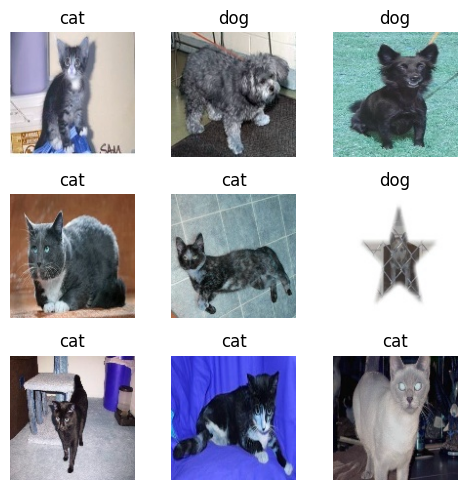

In [97]:
# Show a sample in grid
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import glob
import pandas as pd
import seaborn as sns

def read_data(dataset_path, samples=None):
    images_dir = sorted(os.listdir(os.path.join(dataset_path, 'images')))
    images_path = [os.path.join(dataset_path, 'images', img) for img in images_dir]
    labels_dir = sorted(os.listdir(os.path.join(dataset_path, 'labels')))
    labels_path = [os.path.join(dataset_path, 'labels', lbl) for lbl in labels_dir]
    # Read images
    X = [cv2.imread(img_path) for img_path in images_path]
    # Read labels
    Y = ['label'] * len(X)
    for i, lbl_path in enumerate(labels_path):
        with open(lbl_path, 'r') as file:
            label = file.read().strip()
            Y[i] = 1 if label == 'cat' else 0
    # Convert to numpy arrays and normalize
    X = np.array(X[:samples]) if samples else np.array(X)
    Y = np.array(Y[:samples]) if samples else np.array(Y)
    return X / 255, Y

images, labels = read_data('./dataset/validation_set', samples=30)

def show_images(images, labels):
    fig, axes = plt.subplots(3, 3, figsize=(5, 5))
    rand_indx = random.sample(range(len(images)), 9)
    for i, ax in zip(rand_indx, axes.flat):
        # Add a label to the image
        label = 'cat' if labels[i] == 1 else 'dog'
        ax.set_title(label)
        ax.imshow(images[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

show_images(images, labels)

In [66]:
import tensorflow as tf

## Lendo o dataset de gatos e cães

In [99]:
import os
import cv2
import numpy as np

# Use the method to read data

X, Y = read_data('./dataset/training_set', samples=2000)

## Definindo o modelo
O modelo é uma rede neural convolucional (CNN) com as seguintes camadas:
- Camada de entrada: 64x64 pixels, 3 canais de cor (RGB)
- Camada convolucional 1: 32 filtros, tamanho do kernel 3x3, função de ativação ReLU
- Camada de pooling 1: Max pooling com tamanho de pool 2x2
- Camada convolucional 2: 64 filtros, tamanho do kernel 3x3, função de ativação ReLU
- Camada de pooling 2: Max pooling com tamanho de pool 2x2
- Camada convolucional 3: 128 filtros, tamanho do kernel 3x3, função de ativação ReLU
- Camada de pooling 3: Max pooling com tamanho de pool 2x2
- Camada de flatten: achata a saída da camada convolucional
- Camada densa 1: 128 neurônios, função de ativação ReLU
- Camada de saída: 1 neurônio, função de ativação sigmoide (para classificação binária)

In [104]:
# Define the model
# Define the model with convolutional layers
model = tf.keras.models.Sequential([
    # Convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),

    # MaxPooling layer to reduce spatial dimensions
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Second convolutional layer with 64 filters
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # MaxPooling layer to reduce spatial dimensions
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Third convolutional layer with 128 filters
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),

    # MaxPooling layer to reduce spatial dimensions
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten the output to connect to a dense layer
    tf.keras.layers.Flatten(),

    # Fully connected layer with 128 units and ReLU activation
    tf.keras.layers.Dense(32, activation='relu'),

    # Output layer with a single unit for binary classification (sigmoid activation)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Display the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 14, 14, 128)      

## Compilando e treinando o modelo
O modelo é treinado por 100 épocas no mesmo conjunto de dados pequeno.

In [107]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(X.shape)
print(Y.shape)
model.fit(X, Y, epochs=15, batch_size=4, validation_split=0.2, verbose=1)

(2000, 128, 128, 3)
(2000,)
Epoch 1/15
400/400 [==============================] - 10s 25ms/step - loss: 0.1884 - accuracy: 0.9312 - val_loss: 0.9173 - val_accuracy: 0.7250
Epoch 2/15
400/400 [==============================] - 10s 24ms/step - loss: 0.1652 - accuracy: 0.9350 - val_loss: 0.8418 - val_accuracy: 0.7275
Epoch 3/15
400/400 [==============================] - 10s 24ms/step - loss: 0.1514 - accuracy: 0.9431 - val_loss: 0.8240 - val_accuracy: 0.7450
Epoch 4/15
400/400 [==============================] - 10s 24ms/step - loss: 0.0879 - accuracy: 0.9694 - val_loss: 1.1229 - val_accuracy: 0.7025
Epoch 5/15
400/400 [==============================] - 10s 24ms/step - loss: 0.0873 - accuracy: 0.9669 - val_loss: 1.3204 - val_accuracy: 0.7125
Epoch 6/15
400/400 [==============================] - 10s 25ms/step - loss: 0.0864 - accuracy: 0.9688 - val_loss: 1.2074 - val_accuracy: 0.7525
Epoch 7/15
400/400 [==============================] - 9s 23ms/step - loss: 0.0299 - accuracy: 0.9925 - val_l

## Avaliando o modelo
Como os dados de treino e teste são os mesmos, esperamos uma acurácia muito alta (overfitting).

7/7 [==============================] - 1s 187ms/step
Accuracy: 69.50%


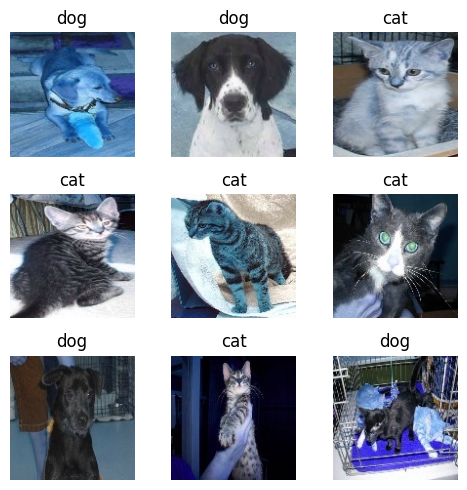

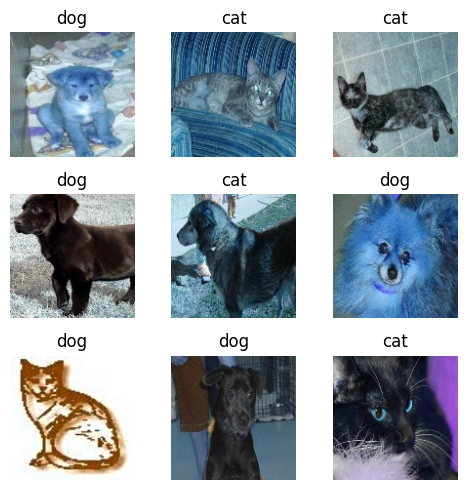

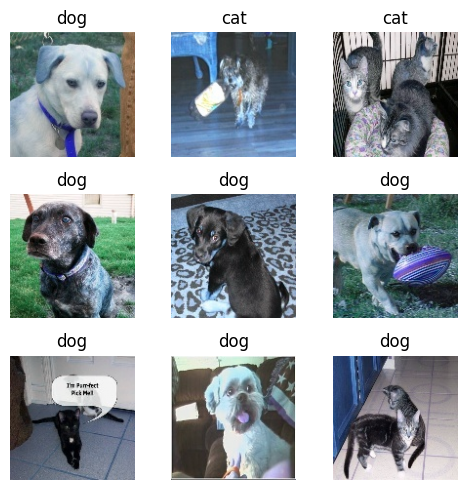

In [108]:
# Add validation data
X_val, Y_val = read_data('./dataset/validation_set')

# Predict on the validation set
Y_pred = model.predict(X_val)
Y_pred = (Y_pred > 0.5).astype(int)

correct = 0
for i in range(len(Y_pred)):
    if Y_pred[i] == Y_val[i]:
        correct += 1
accuracy = correct / len(Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Show the accuracy
show_images(X_val, Y_pred)
show_images(X_val, Y_pred)
show_images(X_val, Y_pred)